Primer examen de PPCD, tiempo de realización 2 horas

In [ ]:
NAME = "Leonardo Negrete Mancera"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Usando el conjunto de datos Iris de sklearn, realiza las siguientes actividades:** (15p)

**a) Con ayuda de un algoritmo de selección conserva las dos características más importantes para el conjunto utilizando un perceptrón ($\eta=0.1$ y replicabilidad 42) como estimador y conserva esas características en un arreglo de numpy para usarlo posteriormente**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectFromModel
import numpy as np

iris = load_iris()
X = iris.data
#print(X)
y = iris.target

perceptron = Perceptron(eta0=0.1, random_state=42)

perceptron.fit(X, y)

selector = SelectFromModel(perceptron, max_features=2, prefit=True)

elegidas = selector.transform(X)

print("Características seleccionadas (shape):", elegidas.shape)

#elegidas = ... # características de la selección secuencial
# X = ... # arreglo con las características de la selección secuencial
print(elegidas)

**b) Aplica el clasificador determinista a priori visto en clase para obtener las funciones discrimantes correspondientes a las tres clases con las características del inciso (a)**

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectFromModel
from sympy import Matrix, symbols, simplify, init_printing


init_printing()


iris = load_iris()
X = iris.data
y = iris.target


perceptron = Perceptron(eta0=0.1, random_state=42)
perceptron.fit(X, y)

selector = SelectFromModel(perceptron, max_features=2, prefit=True)
X_selected = selector.transform(X)
print(X_selected)

X_class_0 = X_selected[y == 0].T  # Setosa
X_class_1 = X_selected[y == 1].T  # Versicolor
X_class_2 = X_selected[y == 2].T  # Virginica


def clasif_e(samples):
    X = Matrix([symbols(f'x{i}') for i in range(samples[0].shape[0])])
    fds = []
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        fd = simplify(X.T * m - (m.T * m) / 2)
        fds.append(fd)
    return fds

fds = clasif_e([X_class_0, X_class_1, X_class_2])

for i, fd in enumerate(fds):
    print(f"Función discriminante para clase {i}:")
    display(fd)

[[3.5 0.2]
 [3.  0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.6 0.2]
 [3.9 0.4]
 [3.4 0.3]
 [3.4 0.2]
 [2.9 0.2]
 [3.1 0.1]
 [3.7 0.2]
 [3.4 0.2]
 [3.  0.1]
 [3.  0.1]
 [4.  0.2]
 [4.4 0.4]
 [3.9 0.4]
 [3.5 0.3]
 [3.8 0.3]
 [3.8 0.3]
 [3.4 0.2]
 [3.7 0.4]
 [3.6 0.2]
 [3.3 0.5]
 [3.4 0.2]
 [3.  0.2]
 [3.4 0.4]
 [3.5 0.2]
 [3.4 0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.4 0.4]
 [4.1 0.1]
 [4.2 0.2]
 [3.1 0.2]
 [3.2 0.2]
 [3.5 0.2]
 [3.6 0.1]
 [3.  0.2]
 [3.4 0.2]
 [3.5 0.3]
 [2.3 0.3]
 [3.2 0.2]
 [3.5 0.6]
 [3.8 0.4]
 [3.  0.3]
 [3.8 0.2]
 [3.2 0.2]
 [3.7 0.2]
 [3.3 0.2]
 [3.2 1.4]
 [3.2 1.5]
 [3.1 1.5]
 [2.3 1.3]
 [2.8 1.5]
 [2.8 1.3]
 [3.3 1.6]
 [2.4 1. ]
 [2.9 1.3]
 [2.7 1.4]
 [2.  1. ]
 [3.  1.5]
 [2.2 1. ]
 [2.9 1.4]
 [2.9 1.3]
 [3.1 1.4]
 [3.  1.5]
 [2.7 1. ]
 [2.2 1.5]
 [2.5 1.1]
 [3.2 1.8]
 [2.8 1.3]
 [2.5 1.5]
 [2.8 1.2]
 [2.9 1.3]
 [3.  1.4]
 [2.8 1.4]
 [3.  1.7]
 [2.9 1.5]
 [2.6 1. ]
 [2.4 1.1]
 [2.4 1. ]
 [2.7 1.2]
 [2.7 1.6]
 [3.  1.5]
 [3.4 1.6]
 [3.1 1.5]
 [2.3 1.3]
 [3.  1.3]
 [2.5 1.3]
 [2.6 1.2]

[3.428⋅x₀ + 0.246⋅x₁ - 5.90585]

Función discriminante para clase 1:


[2.77⋅x₀ + 1.326⋅x₁ - 4.715588]

Función discriminante para clase 2:


[2.974⋅x₀ + 2.026⋅x₁ - 6.474676]

**c) Aplica el clasificador probabilista a priori visto en clase para obtener las funciones discrimantes correspondientes a las tres clases con las características obtenidas en el inciso (a)**

In [4]:
import numpy as np
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectFromModel
from sympy import Matrix, symbols, simplify, init_printing


init_printing()


iris = load_iris()
X = iris.data
y = iris.target


perceptron = Perceptron(eta0=0.1, random_state=42)
perceptron.fit(X, y)

selector = SelectFromModel(perceptron, max_features=2, prefit=True)
X_selected = selector.transform(X)


X_class_0 = X_selected[y == 0].T  # Setosa
X_class_1 = X_selected[y == 1].T  # Versicolor
X_class_2 = X_selected[y == 2].T  # Virginica



#SYMPY => Simbolic python
from sympy import Matrix, symbols, simplify, log

def clasif_m(samples):
    #Matriz de variables predictorias
    X = Matrix( [ symbols( "x"+str(i) ) for i in range(samples[0].shape[0])  ] )
    #print(x)
    fds=[]
    for s in  samples:
        m = Matrix(np.mean(s,axis=1))
        mcov = np.cov(s,bias=True)
        mci = Matrix(mcov).inv()
        print("media: \n",m,"cov: \n", mcov, "Matriz Cov Invertido: \n", mci)
        fds.append( simplify( -.5*(X.T*mci*X) + X.T*mci*m -.5*(m.T*mci*m) -Matrix([.5*(log (mci.det()))]) ) )
    return fds


for i, fd in enumerate(fds):
    print(f"Función discriminante para clase {i}:")
    display(fd)


Función discriminante para clase 0:


[3.428⋅x₀ + 0.246⋅x₁ - 5.90585]

Función discriminante para clase 1:


[2.77⋅x₀ + 1.326⋅x₁ - 4.715588]

Función discriminante para clase 2:


[2.974⋅x₀ + 2.026⋅x₁ - 6.474676]

**2. Con la versión propia del Perceptrón escrita en clase ($\eta=0.1$, replicabilidad nula) simula la clasificación multiclase sobre el conjunto Iris reducido con la selección secuencial** (15p)

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron as SKPerceptron
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target


selector_model = SKPerceptron(eta0=0.1, random_state=42)
selector_model.fit(X, y)
selector = SelectFromModel(selector_model, max_features=2, prefit=True)
X_reduced = selector.transform(X)


class Perceptron():
    def __init__(self, eta=0.01, n_iter=50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self ,X ,y ):
        rgen = np.random.RandomState(self.random_state)
        if self.random_state is None:
            self.w_ = np.zeros(1 + X.shape[1])
        else:
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

perceptrons = []
pesos = []

for clase in [0, 1, 2]:
    y_binary = np.where(y == clase, 1, -1)  # Clase actual como 1, resto como -1
    p = Perceptron(eta=0.1, n_iter=50, random_state=None)
    p.fit(X_reduced, y_binary)
    perceptrons.append(p)
    pesos.append(p.w_)


pesos1, pesos2, pesos3 = pesos

print("Pesos clase 0 (Setosa):", pesos1)
print("Pesos clase 1 (Versicolor):", pesos2)
print("Pesos clase 2 (Virginica):", pesos3)


Pesos clase 0 (Setosa): [ 0.    0.06 -0.24]
Pesos clase 1 (Versicolor): [ 0.    0.06 -1.18]
Pesos clase 2 (Virginica): [-1.  -2.4  5.4]


**3. Realiza una una función *desde cero* que reciba un *DataFrame*, el nombre de la columna de la que se obtendrán las categorías y el nombre de la columna objetivo para determinar el *peso de la evidencia* de cada categoría; tu función debe devolver una lista de parejas $[cat, woe\_cat]$** (15p)

In [6]:
import pandas as pd
import numpy as np

def woe(df, col, col_obj):
    """
    Parametros:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col (str): Nombre de la columna categórica.
        col_obj (str): Nombre de la columna objetivo binaria (0 y 1).

    Atributos:
        List of [categoria, woe_valor]
    """


    total_good = (df[col_obj] == 1).sum()
    total_bad = (df[col_obj] == 0).sum()

    grouped = df.groupby(col)[col_obj].agg(['count', 'sum'])
    grouped.columns = ['total', 'good']
    grouped['bad'] = grouped['total'] - grouped['good']

    grouped['dist_good'] = grouped['good'] / total_good
    grouped['dist_bad'] = grouped['bad'] / total_bad


    grouped['woe'] = np.log(grouped['dist_good'] / grouped['dist_bad']).replace([np.inf, -np.inf], np.nan)

    result = grouped['woe'].reset_index().values.tolist()

    return result

#def woe(df, col, col_obj)

**a) Importa el conjunto de datos *diabetes_data.csv* y aplica tu función a las columnas *GenHlth*, *Income* y *Education***

In [11]:
import pandas as pd

# Upload the file if it's not already present
# If the file is already uploaded, you might skip this line or run it again to re-upload
# If you run it multiple times, it might prompt you to upload again.


df = pd.read_csv('diabetes_data.csv')
print(df.head(2))

woe_genhlth = woe(df, 'GenHlth', 'Diabetes_binary')
print(woe_genhlth)
woe_income = woe(df, 'Income', 'Diabetes_binary')
print(woe_income)
woe_education = woe(df, 'Education', 'Diabetes_binary')
print(woe_education)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              1.0     0.0       1.0        1.0  23.0     1.0     0.0   
1              0.0     0.0       0.0        1.0  33.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      4.0       0.0       0.0       0.0  0.0  10.0        4.0   
1          0.0      3.0       0.0       3.0       1.0  0.0  13.0        5.0   

   Income  
0     5.0  
1     4.0  

[2 rows x 22 columns]
[[1.0, -1.8390361858146629], [2.0, -0.7619574881085688], [3.0, 0.30375664968025856], [4.0, 1.0070241413245922], [5.0, 1.3130367027292869]]
[[1.0, 0.6695131851656101], [2.0, 0.7541424842097451], [3.0, 0.5929274727014505], [4.0, 0.4437170558425892], [5.0, 0.2624188333669962], 

**4. Realiza una una función que reciba un *DataFrame* y el nombre de una columna como parámetros; calcule *desde cero* las anomalías con el método de los cuartiles visto en clase y devuelva una lista con los índices de los valores anómalos** (10p)

In [12]:
def detectar_anomalias(df, col):



    if col not in df.columns:
        raise ValueError(f"La columna '{col}' no existe en el DataFrame.")


    serie = df[col]


    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1


    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr


    anomalias = serie[(serie < limite_inferior) | (serie > limite_superior)]

    return anomalias.index.tolist()


**a) Construye un *DataFrame* con el conjunto de datos *Iris* y aplica tu obtención de anomalías a las 4 columnas**

--- REPORTE DE ANOMALÍAS (OUTLIERS) ---
  sepal length (cm): No se detectaron anomalías.
  sepal width (cm): Se detectaron anomalías en los índices [15, 32, 33, 60]
  petal length (cm): No se detectaron anomalías.
  petal width (cm): No se detectaron anomalías.


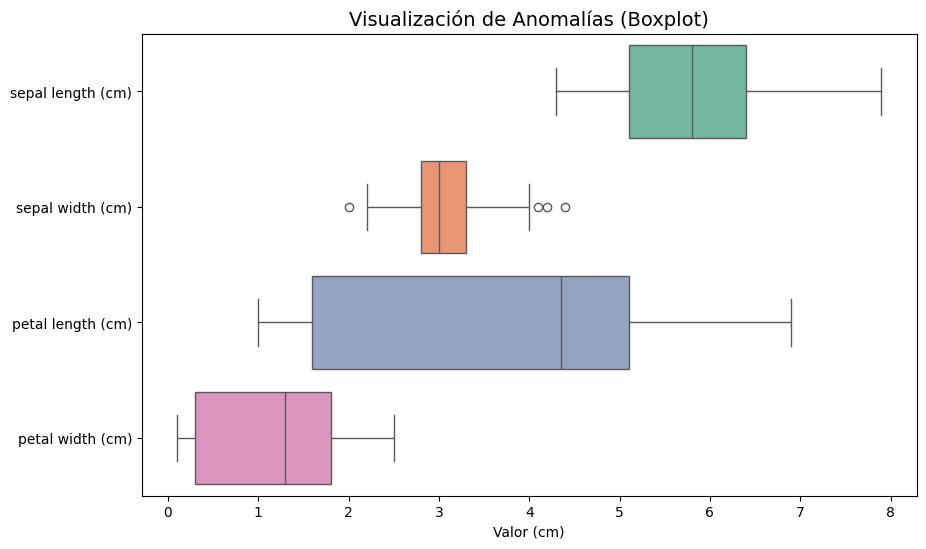

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


def detectar_anomalias(df, col):
    """
    Detecta outliers usando el rango intercuartílico (IQR).
    Retorna una lista de índices.
    """
    if col not in df.columns:
        raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

    serie = df[col]
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR


    anomalias = serie[(serie < limite_inf) | (serie > limite_sup)]

    return anomalias.index.tolist()

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print("--- REPORTE DE ANOMALÍAS (OUTLIERS) ---")

anomalias_dict = {}

for col in df_iris.columns:
    indices_outliers = detectar_anomalias(df_iris, col)
    anomalias_dict[col] = indices_outliers

    if indices_outliers:
        print(f"  {col}: Se detectaron anomalías en los índices {indices_outliers}")
    else:
        print(f"  {col}: No se detectaron anomalías.")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, orient="h", palette="Set2")
plt.title("Visualización de Anomalías (Boxplot)", fontsize=14)
plt.xlabel("Valor (cm)")
plt.show()

**5. Realiza una implementación de PCA *desde cero* que cumpla con la siguiente cadena de documentación:** (10p)

In [16]:
import numpy as np

class PCA_():
    """
    PCA
    Parameters
    ------------
    n_pca: int
      Número de componentes a conservar; default = None
    Attributes
    ------------
    var_exp_ : 1d_array
      Varianza explicada individual
    cum_var_exp_ : 1d_array
      Varianza explicada acumulativa
    w_ : 2d_array
      Matriz de transformación con los vectores propios de las n_pca primeras
      componentes ordenadas
    """

    def __init__(self, n_pca=None):
        self.n_pca = n_pca
        self.var_exp_ = None
        self.cum_var_exp_ = None
        self.w_ = None
        self.mean_ = None

    def fit(self, X):
        """
        Aprendizaje con PCA
        Si n_pca es nulo, aplica el algoritmo y w_ tiene el mismo número de columnas
        que el conjunto original; en otro caso w_ tendrá n_pca columnas
        Parameters
        ------------
        X : 2d_array, shape = [n_samples, m_features]
          Vectores de entrenamiento con n_samples filas y m_features columnas
        """

        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_


        cov_mat = np.cov(X_centered, rowvar=False)


        eig_vals, eig_vecs = np.linalg.eigh(cov_mat)


        sorted_idx = np.argsort(eig_vals)[::-1]
        eig_vals_sorted = eig_vals[sorted_idx]
        eig_vecs_sorted = eig_vecs[:, sorted_idx]


        total_var = np.sum(eig_vals_sorted)
        self.var_exp_ = eig_vals_sorted / total_var
        self.cum_var_exp_ = np.cumsum(self.var_exp_)


        if self.n_pca is None:
            self.w_ = eig_vecs_sorted
        else:
            self.w_ = eig_vecs_sorted[:, :self.n_pca]

    def transform(self, X):
        """
        Transforma el conjunto de entrada
        Parameters
        ------------
        X : 2d_array, shape = [n_samples, m_features]
          Vectores de entrenamiento con n_samples filas y m_features columnas
        Returns
        ------------
        2d_array, shape = [n_samples, n_pca]
          Vectores de entrada proyectados al nuevo espacio con ayuda de la matriz w_
        """
        X_centered = X - self.mean_
        return np.dot(X_centered, self.w_)


**a) Aplica PCA (propio) para determinar el número de componentes necesarias para conservar el 80% de la información del conjunto con ayuda de los vaalores que se obtienen al entrenar el objeto pca**

In [17]:
from sklearn.datasets import load_wine
import numpy as np


wine = load_wine()
X = wine.data


pca = PCA_()
pca.fit(X)


cum_var = pca.cum_var_exp_


display(cum_var)


array([0.99809123, 0.99982715, 0.99992211, 0.99997232, 0.99998469,
       0.99999315, 0.99999596, 0.99999748, 0.99999861, 0.99999933,
       0.99999971, 0.99999992, 1.        ])

**b) Aplica tu versión de PCA para reducir el conjunto al número de componentes que determinaste en el inciso (a); entrena una regresión logística con sus parámetros por omisión y calcula su exactitud**

In [18]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


wine = load_wine()
X = wine.data
y = wine.target


pca_full = PCA_()
pca_full.fit(X)
cum_var = pca_full.cum_var_exp_
n_components_80 = np.argmax(cum_var >= 0.80) + 1
#print(n_components_80)


pca_reducido = PCA_(n_pca=n_components_80)
pca_reducido.fit(X)
X_reducido = pca_reducido.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, random_state=42, test_size=0.3)


clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
lr_score = accuracy_score(y_test, y_pred)
print(lr_score)
#print(y_pred)


0.7037037037037037


**c) Aplica el análisis lineal discriminante (LDA) para reducir el conjunto al mismo número de componentes del inciso (a) o al máximo posible, explica tu resultado**

In [19]:
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

wine = load_wine()
X = wine.data
y = wine.target

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

print("Forma del conjunto reducido por LDA:", X_lda.shape)
#print(X_lda)
print("A diferencia de PCA, que es no supervisado y puede conservar el número total de características, LDA es un método supervisado que maximiza la separabilidad entre clases. El número máximo de componentes en LDA está limitado por el número de clases menos uno.En el conjunto Wine hay 3 clases, por lo que el número máximo de componentes LDA es: n_clases−1 = 3−1 = 2. Por lo tanto, aunque en PCA se requerían más componentes para conservar el 80% de la varianza, LDA solo puede reducir el conjunto a 2 componentes que maximizan la separación entre clases.")

Forma del conjunto reducido por LDA: (178, 2)
A diferencia de PCA, que es no supervisado y puede conservar el número total de características, LDA es un método supervisado que maximiza la separabilidad entre clases. El número máximo de componentes en LDA está limitado por el número de clases menos uno.En el conjunto Wine hay 3 clases, por lo que el número máximo de componentes LDA es: n_clases−1 = 3−1 = 2. Por lo tanto, aunque en PCA se requerían más componentes para conservar el 80% de la varianza, LDA solo puede reducir el conjunto a 2 componentes que maximizan la separación entre clases.


**d) Aplica PCA (propio) y LDA para reducir a dos componentes; para cada uno entrena una regresión logística con sus parámetros por omisión y calcula su exactitud**


In [20]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np


wine = load_wine()
X = wine.data
y = wine.target


pca = PCA_(n_pca=2)
pca.fit(X)
X_pca = pca.transform(X)


lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)


X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.3, random_state=42)


clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
lr_score_pca = accuracy_score(y_test, y_pred_pca)


clf_lda = LogisticRegression()
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
lr_score_lda = accuracy_score(y_test, y_pred_lda)

display(lr_score_pca, lr_score_lda)


0.6851851851851852

1.0

**7. ¿Qué sucede al utilizar *LDA* sobre el conjunto de medias lunas?** (5p)

Su desempeño es muy pobre porque LDA no puede capturar la estructura no lineal del conjunto y al proyectar los datos en un espacio lineal, LDA aplasta la forma curva de las lunas, mezclando las clases, y eso reduce significativamente la capacidad de discriminación.

**8. Implementa *desde cero* KernelPCA con la siguiente función de Kernel:** (20p)
$$
k(x^{(i)}, x^{(j)}) = \sum_{p=0}^k (c \times x^{(i)} \cdot x^{(j)})^p
$$
$c$ es un escalar y $k$ es un número natural

In [21]:
import numpy as np

class KernelPCA_:
    def __init__(self, n_components=2, c=1, k=2):
        self.n_components = n_components
        self.c = c
        self.k = k
        self.alphas_ = None
        self.lambdas_ = None
        self.X_fit_ = None
        self.K_fit_ = None

    def _kernel(self, X, Y):
        """ Kernel polinomial personalizado """
        dot = np.dot(X, Y.T)
        K = np.zeros(dot.shape)
        for p in range(self.k + 1):
            K += (self.c * dot) ** p
        return K

    def _center_kernel(self, K):
        """ Centra la matriz de kernel """
        N = K.shape[0]
        one_n = np.ones((N, N)) / N
        K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
        return K_centered

    def fit(self, X):
        """ Ajusta Kernel PCA """
        self.X_fit_ = X
        K = self._kernel(X, X)
        K_centered = self._center_kernel(K)
        self.K_fit_ = K_centered


        eigvals, eigvecs = np.linalg.eigh(K_centered)


        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]


        self.lambdas_ = eigvals[:self.n_components]
        self.alphas_ = eigvecs[:, :self.n_components]


        self.alphas_ = self.alphas_ / np.sqrt(self.lambdas_)

        return self

    def transform(self, X):
        """ Proyecta nuevos datos al espacio del kernel """
        K = self._kernel(X, self.X_fit_)
        K_centered = K - np.mean(self.K_fit_, axis=0)  # centrar respecto al entrenamiento
        return np.dot(K_centered, self.alphas_)


**a) Genera un conjunto de datos de *medias lunas* con 200 muestras, ruido=0.05, replicabilidad=42; utiliza los valores $[1,5,10,15]$ para los parámetros $c$ y $k$ de tu función $KernelPCA$ y determina la mejor combinación; explica tu elección**

In [22]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)


param_values = [1, 5, 10, 15]


results = {}

for c in param_values:
    for k in param_values:
        kpca = KernelPCA_(n_components=2, c=c, k=k)
        kpca.fit(X)
        X_kpca = kpca.transform(X)


        X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, test_size=0.3, random_state=42)
        clf = LogisticRegression()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)


        results[(c, k)] = acc


best_params = max(results, key=results.get)


print(f"mejor: c = {best_params[0]}, k = {best_params[1]}")


mejor: c = 10, k = 15


**b) Genera un conjunto de datos de *círculos concéntricos* con 200 muestras, ruido=0.1, factor=0.5 y replicabilidad=42; utiliza los valores $[1,5,10,15]$ para los parámetros $c$ y $k$ de tu función $KernelPCA$ y determina la mejor combinación; explica tu elección**

In [23]:
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np


X, y = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)


param_values = [1, 5, 10, 15]
results = {}


for c in param_values:
    for k in param_values:
        kpca = KernelPCA_(n_components=2, c=c, k=k)
        kpca.fit(X)
        X_kpca = kpca.transform(X)


        X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, test_size=0.3, random_state=42)
        clf = LogisticRegression()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)


        results[(c, k)] = acc


best_params = max(results, key=results.get)
best_acc = results[best_params]

print(f"mejor: c = {best_params[0]}, k = {best_params[1]}")
print(f"niveñ de exactitud: {best_acc:.4f}")


mejor: c = 5, k = 10
niveñ de exactitud: 0.8667


**9. Elige dos estimadores y demuestra que definen algoritmos escalables** (5p)
$$
\underset{p\times1}{\overline{\mathbf{x}}}=n^{-1}\left[\sum_{i=1}^{n}x_{i,1},\ldots,\sum_{i=1}^{n}x_{i,p}\right]^{T}
$$
$$
\hat{\sigma}_{j}^{2}=n^{-1}\sum_{i=1}^{n}x_{i,j}^{2}-\overline{x}_{j}^{2}
$$
$$
\hat{\sigma}_{jk}=n^{-1}\sum_{i=1}^{n}x_{i,j}x_{i,k}-\overline{x}_{j}\overline{x}_{k}
$$

# Demostración Matemática de Escalabilidad

## 1. Vector de Medias Muestrales

### Definición:
$$
\overline{\mathbf{x}}^{(n)} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i
$$

### Actualización Online:
Sea:
- $(n_{old})$: tamaño de muestra anterior
- $(\overline{\mathbf{x}}_{old})$: media anterior
- (m): nuevo lote de datos $(\{\mathbf{y}_1, \ldots, \mathbf{y}_m\}$$)

Entonces:
$$
n_{new} = n_{old} + m
$$
$$
\overline{\mathbf{x}}_{new} = \frac{1}{n_{new}} \left( \sum_{i=1}^{n_{old}} \mathbf{x}_i + \sum_{j=1}^{m} \mathbf{y}_j \right)
$$

Sustituyendo:
$$
\sum_{i=1}^{n_{old}} \mathbf{x}_i = n_{old} \cdot \overline{\mathbf{x}}_{old}
$$
$$
\overline{\mathbf{x}}_{new} = \frac{1}{n_{new}} \left( n_{old} \cdot \overline{\mathbf{x}}_{old} + \sum_{j=1}^{m} \mathbf{y}_j \right)
$$

### Complejidad:
- Cálculo del nuevo lote: $(O(mp))$
- Combinación: $(O(p))$
- Memoria: $(O(p))$ (solo guardar $(n_{old}))$ y $(overline{\mathbf{x}}_{old}))$
- No depende de $(n_{old})$, solo del nuevo lote (m)

---

## 2. Varianza Muestral

### Definición:
$$
\hat{\sigma}_j^2 = \frac{1}{n} \sum_{i=1}^{n} x_{i,j}^2 - \bar{x}_j^2
$$

### Formulación equivalente:
$$
\hat{\sigma}_j^2 = \frac{1}{n} \sum_{i=1}^{n} (x_{i,j} - \bar{x}_j)^2
$$

### Algoritmo de actualización (Welford):
Definimos estadísticos suficientes:
1. $(n)$: contador de muestras
2. $(\bar{x}_j)$: media acumulada
3. $(M2_j)$: suma de cuadrados de diferencias

Para cada nueva observación $(x)$:
$$
n_{new} = n_{old} + 1
$$
$$
\delta = x - \bar{x}_{old}
$$
$$
\bar{x}_{new} = \bar{x}_{old} + \frac{\delta}{n_{new}}
$$
$$
M2_{new} = M2_{old} + \delta \cdot (x - \bar{x}_{new})
$$

### Para lotes de tamaño $(m)$:
Sea $(\bar{x}_{batch})$ la media del lote y $(M2_{batch})$ su suma de cuadrados centrada.

$$
n_{new} = n_{old} + m
$$
$$
\delta = \bar{x}_{batch} - \bar{x}_{old}
$$
$$
\bar{x}_{new} = \bar{x}_{old} + \delta \cdot \frac{m}{n_{new}}
$$
$$
M2_{new} = M2_{old} + M2_{batch} + \delta^2 \cdot \frac{n_{old} \cdot m}{n_{new}}
$$

Finalmente:
$$
\hat{\sigma}_j^2 = \frac{M2_{new}}{n_{new}}
$$

### Complejidad:
- Por lote: $(O(m))$ para cada variable
- Memoria: $(O(p))$ (3 valores por variable: $(n)$, $(\bar{x}_j)$, $(M2_j)$)
- Escalabilidad lineal con nuevos datos

---

## 3. Covarianza Muestral

### Definición:
$$
\hat{\sigma}_{jk} = \frac{1}{n} \sum_{i=1}^{n} x_{i,j} x_{i,k} - \bar{x}_j \bar{x}_k
$$

### Estadísticos suficientes:
1. $(n)$: contador
2. $(\bar{x}_j)$, $(\bar{x}_k)$: medias
3. $(S_{jk} = \sum_{i=1}^{n} x_{i,j} x_{i,k})$: suma de productos

### Actualización para una observación $((x_j, x_k))$:
$$
n_{new} = n_{old} + 1
$$
$$
\bar{x}_{j,new} = \bar{x}_{j,old} + \frac{x_j - \bar{x}_{j,old}}{n_{new}}
$$
$$
\bar{x}_{k,new} = \bar{x}_{k,old} + \frac{x_k - \bar{x}_{k,old}}{n_{new}}
$$
$$
S_{jk,new} = S_{jk,old} + x_j x_k
$$

### Para lotes:
Sea $(S_{jk}^{batch} = \sum_{i=1}^{m} x_{i,j}^{batch} x_{i,k}^{batch})$

$$
n_{new} = n_{old} + m
$$
$$
\bar{x}_{j,new} = \frac{n_{old} \cdot \bar{x}_{j,old} + m \cdot \bar{x}_{j}^{batch}}{n_{new}}
$$
$$
S_{jk,new} = S_{jk,old} + S_{jk}^{batch}
$$

La covarianza se calcula bajo demanda:
$$
\hat{\sigma}_{jk} = \frac{S_{jk,new}}{n_{new}} - \bar{x}_{j,new} \cdot \bar{x}_{k,new}
$$

### Complejidad:
- Calcular $(S_{jk}^{batch})$: $(O(m))$ por par de variables
- Memoria:
  - Versión completa: $(O(p^2))$ (matriz $(S)$)
  - Versión por pares: \(O(1)\) por par
- Actualización constante con nuevos datos

**10. Escribe una función que obtenga *desde cero* la matriz de momentos aumentada a partir de un conjunto de vectores dados como arreglo de *numpy* de $[n\_filas, m\_columnas]$** (15p)

In [24]:
import numpy as np

def matriz_momentos_aumentada(X):
    X = X.astype(float)


    n, m = X.shape


    mu = np.mean(X, axis=0)

    moments = (X.T @ X) / n

    M = np.zeros((m+1, m+1))


    M[0, 1:] = mu

    M[1:, 0] = mu


    M[1:, 1:] = moments

    return M

**a) Genera una matriz de $(4\times3)$ con números pseudoaleatorios enteros en el rango $[0,10]$ utilizando un generador de *numpy* con semilla inicializada a 42**


In [25]:
import numpy as np


rng = np.random.default_rng(seed=42)


A = rng.integers(low=0, high=11, size=(4, 3))


display(A)


array([[ 0,  8,  7],
       [ 4,  4,  9],
       [ 0,  7,  2],
       [ 1,  5, 10]])

**b) Aplica tu función de matriz de momentos aumentada a la matriz generada en el punto anterior**

In [26]:

amm = matriz_momentos_aumentada(A)


display(amm)

array([[ 0.  ,  1.25,  6.  ,  7.  ],
       [ 1.25,  4.25,  5.25, 11.5 ],
       [ 6.  ,  5.25, 38.5 , 39.  ],
       [ 7.  , 11.5 , 39.  , 58.5 ]])

**11. Obtén las expresiones para determinar los intervalos de contenedores para histogramas bidimensionales en función del número de contenedores:** (5p)

Para construir un histograma 2D basado en un número predefinido de contenedores (*bins*), definimos las siguientes variables:

* **Rango de los datos en X:** $[x_{min}, x_{max}]$
* **Rango de los datos en Y:** $[y_{min}, y_{max}]$
* **Número de contenedores deseados:** $k_x$ (para el eje X) y $k_y$ (para el eje Y).

#### 1. Cálculo del Ancho de los Intervalos ($\Delta$)
El primer paso es determinar la amplitud de cada contenedor dividiendo el rango total por el número de bins:

$$\Delta x = \frac{x_{max} - x_{min}}{k_x}$$

$$\Delta y = \frac{y_{max} - y_{min}}{k_y}$$

#### 2. Expresión de los Límites (Bordes de los contenedores)
Los intervalos se definen mediante sus límites (bordes). La secuencia de bordes se genera sumando múltiplos del ancho al valor mínimo.

**Para el eje X:**
El $i$-ésimo borde, denotado como $e_{x,i}$, se calcula así:
$$e_{x,i} = x_{min} + i \cdot \Delta x \quad \text{para } i = 0, 1, ..., k_x$$

**Para el eje Y:**
El $j$-ésimo borde, denotado como $e_{y,j}$, se calcula así:
$$e_{y,j} = y_{min} + j \cdot \Delta y \quad \text{para } j = 0, 1, ..., k_y$$

#### 3. Definición del Contenedor
Un contenedor (bin) específico en la posición $(i, j)$ de la cuadrícula cubre el área rectangular definida por la intersección de los intervalos actuales y los siguientes:

$$\text{Bin}_{i,j} = [e_{x,i}, \ e_{x,i+1}) \times [e_{y,j}, \ e_{y,j+1})$$

**a) ¿Tus expresiones representan una estadística asociativa?**

### a) ¿Tus expresiones representan una estadística asociativa?

**Respuesta: No.**

**Justificación:**

1.  **Naturaleza de las expresiones:** Las fórmulas para determinar el ancho ($\Delta$) y los límites de los intervalos son expresiones de **discretización** y partición geométrica. Se basan en estadísticos de **orden** (Mínimo y Máximo) y de **dispersión** (el Rango), calculados para cada variable de forma independiente.

2.  **Diferencia con la Asociación:** Una estadística asociativa (como la covarianza o el coeficiente de correlación) debe cuantificar la dependencia o relación entre dos variables. Las expresiones de los intervalos no miden esta relación, solo definen la estructura de la cuadrícula.



**12. Genera una matriz de números pseudoaleatorios enteros en el rango $[0,10]$ de $(16\times4)$ utilizando un generador de *numpy* con semilla inicializada a 42** (15p)

**a) Aplica tu implementación de la pregunta 9 a esta matriz**

In [27]:

rng = np.random.default_rng(seed=42)


A_ = rng.integers(low=0, high=11, size=(16, 4))


display(A_)

amm_ = matriz_momentos_aumentada(A_)

display(amm_)

array([[ 0,  8,  7,  4],
       [ 4,  9,  0,  7],
       [ 2,  1,  5, 10],
       [ 8,  8,  7,  8],
       [ 5,  1,  9,  4],
       [ 5,  4,  2, 10],
       [ 8,  7,  4,  9],
       [ 5,  4,  4,  2],
       [ 1,  6,  9,  0],
       [ 9,  9,  3,  6],
       [ 1,  8,  7,  3],
       [ 0, 10,  4,  9],
       [ 7,  8,  8,  2],
       [ 4,  5,  5,  0],
       [ 6,  1,  8,  7],
       [10,  8,  4, 10]])

array([[ 0.    ,  4.6875,  6.0625,  5.375 ,  5.6875],
       [ 4.6875, 31.6875, 28.75  , 23.75  , 29.8125],
       [ 6.0625, 28.75  , 45.4375, 30.25  , 34.6875],
       [ 5.375 , 23.75  , 30.25  , 35.25  , 26.3125],
       [ 5.6875, 29.8125, 34.6875, 26.3125, 44.3125]])

**b) Simula el cálculo de la matriz de momentos aumentada en un entorno *Map-Reduce* con 4 nodos secundarios: el nodo 1 recibe el primer bloque de datos y así sucesivamente**

In [28]:
import numpy as np

rng = np.random.default_rng(seed=42)
A_ = rng.integers(low=0, high=11, size=(16, 4))

print("--- DATOS ORIGINALES (A_) ---")
print(A_)
print("\n" + "="*40 + "\n")

chunks = np.array_split(A_, 4)


map_results = []


for i, chunk in enumerate(chunks):
    node_id = i + 1

    ones_col = np.ones((chunk.shape[0], 1))
    chunk_aug = np.hstack([ones_col, chunk])

    local_moment_matrix = chunk_aug.T @ chunk_aug

    map_results.append(local_moment_matrix)

    print(f"Node {node_id} procesó filas {i*4} a {(i*4)+3}")
    print(f"Matriz Local (Node {node_id}):\n{local_moment_matrix}\n")



reduced_result = np.zeros_like(map_results[0])

for res in map_results:
    reduced_result += res

print("Matriz de Momentos Aumentada Final:")
print(reduced_result)


--- DATOS ORIGINALES (A_) ---
[[ 0  8  7  4]
 [ 4  9  0  7]
 [ 2  1  5 10]
 [ 8  8  7  8]
 [ 5  1  9  4]
 [ 5  4  2 10]
 [ 8  7  4  9]
 [ 5  4  4  2]
 [ 1  6  9  0]
 [ 9  9  3  6]
 [ 1  8  7  3]
 [ 0 10  4  9]
 [ 7  8  8  2]
 [ 4  5  5  0]
 [ 6  1  8  7]
 [10  8  4 10]]


Node 1 procesó filas 0 a 3
Matriz Local (Node 1):
[[  4.  14.  26.  19.  29.]
 [ 14.  84. 102.  66. 112.]
 [ 26. 102. 210. 117. 169.]
 [ 19.  66. 117. 123. 134.]
 [ 29. 112. 169. 134. 229.]]

Node 2 procesó filas 4 a 7
Matriz Local (Node 2):
[[  4.  23.  16.  19.  25.]
 [ 23. 139. 101. 107. 152.]
 [ 16. 101.  82.  61. 115.]
 [ 19. 107.  61. 117. 100.]
 [ 25. 152. 115. 100. 201.]]

Node 3 procesó filas 8 a 11
Matriz Local (Node 3):
[[  4.  11.  33.  23.  18.]
 [ 11.  83.  95.  43.  57.]
 [ 33.  95. 281. 177. 168.]
 [ 23.  43. 177. 155.  75.]
 [ 18.  57. 168.  75. 126.]]

Node 4 procesó filas 12 a 15
Matriz Local (Node 4):
[[  4.  27.  22.  25.  19.]
 [ 27. 201. 162. 164. 156.]
 [ 22. 162. 154. 129. 103.]
 [ 25. 164. 12